In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import os.path
import os,re
import glob
import pprint
import pathlib
import threading
import time
import joblib
from pandas import DataFrame
from datetime import datetime,timedelta
import datetime
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from tensorflow import keras
from sklearn.utils import shuffle

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Hancom Gothic Regular.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
plt.rcParams['axes.unicode_minus'] = False
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina'")

### F.P.MCPL Data for DNN 

In [5]:
new_data = pd.read_csv(r'H:\연구실\2022진동_졸업논문정리\new_data.csv',index_col=0)

In [6]:
# X,Y
x = new_data.iloc[:,0:6000]
y = new_data.iloc[:,6002:].values

In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify = y)

### DNN_Model3

In [9]:
# data : 500 data per each state and capacity 

# model3 = 32,16,8
dnn_model3 = tf.keras.Sequential()
dnn_model3 .add(tf.keras.layers.Dense(32, activation='relu', input_shape=[6000]))
dnn_model3 .add(tf.keras.layers.Dense(16, activation='relu'))
dnn_model3 .add(tf.keras.layers.Dense(8, activation='relu'))
dnn_model3 .add(tf.keras.layers.Dense(37, activation='softmax'))

optimizer = tf.keras.optimizers.Adam()
dnn_model3 .compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

In [10]:
dnn_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192032    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 37)                333       
                                                                 
Total params: 193,029
Trainable params: 193,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
checkpoint_path = "dnn_model3.ckpt" 

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True, 
                                                 monitor='val_loss', 
hist = dnn_model3.fit(train_x, 
          train_y,  
          epochs=32,batch_size = 16,
          validation_data=(val_x,val_y),
          callbacks=[cp_callback])  

Epoch 1/32
765/810 [===========================>..] - ETA: 0s - loss: 3.1455 - accuracy: 0.1077
Epoch 1: val_loss improved from inf to 2.55839, saving model to dnn_model3.ckpt
810/810 [==============================] - 2s 2ms/step - loss: 3.1157 - accuracy: 0.1148 - val_loss: 2.5584 - val_accuracy: 0.2895
Epoch 2/32
761/810 [===========================>..] - ETA: 0s - loss: 2.1785 - accuracy: 0.3236
Epoch 2: val_loss improved from 2.55839 to 1.83605, saving model to dnn_model3.ckpt
810/810 [==============================] - 1s 1ms/step - loss: 2.1589 - accuracy: 0.3278 - val_loss: 1.8360 - val_accuracy: 0.4350
Epoch 3/32
793/810 [============================>.] - ETA: 0s - loss: 1.6343 - accuracy: 0.4727
Epoch 3: val_loss improved from 1.83605 to 1.43656, saving model to dnn_model3.ckpt
810/810 [==============================] - 1s 1ms/step - loss: 1.6307 - accuracy: 0.4735 - val_loss: 1.4366 - val_accuracy: 0.4989
Epoch 4/32
772/810 [===========================>..] - ETA: 0s - loss: 1

Epoch 28/32
794/810 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9998
Epoch 28: val_loss improved from 0.00752 to 0.00591, saving model to dnn_model3.ckpt
810/810 [==============================] - 1s 1ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 29/32
780/810 [===========================>..] - ETA: 0s - loss: 0.0092 - accuracy: 0.9986
Epoch 29: val_loss did not improve from 0.00591
810/810 [==============================] - 1s 1ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.0131 - val_accuracy: 0.9960
Epoch 30/32
798/810 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9993
Epoch 30: val_loss did not improve from 0.00591
810/810 [==============================] - 1s 1ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0066 - val_accuracy: 0.9995
Epoch 31/32
806/810 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9995
Epoch 31: val_loss improved from 0.005

In [13]:
dnn_model3.save('dnn_model3.h')

INFO:tensorflow:Assets written to: dnn_model3.h\assets


INFO:tensorflow:Assets written to: dnn_model3.h\assets


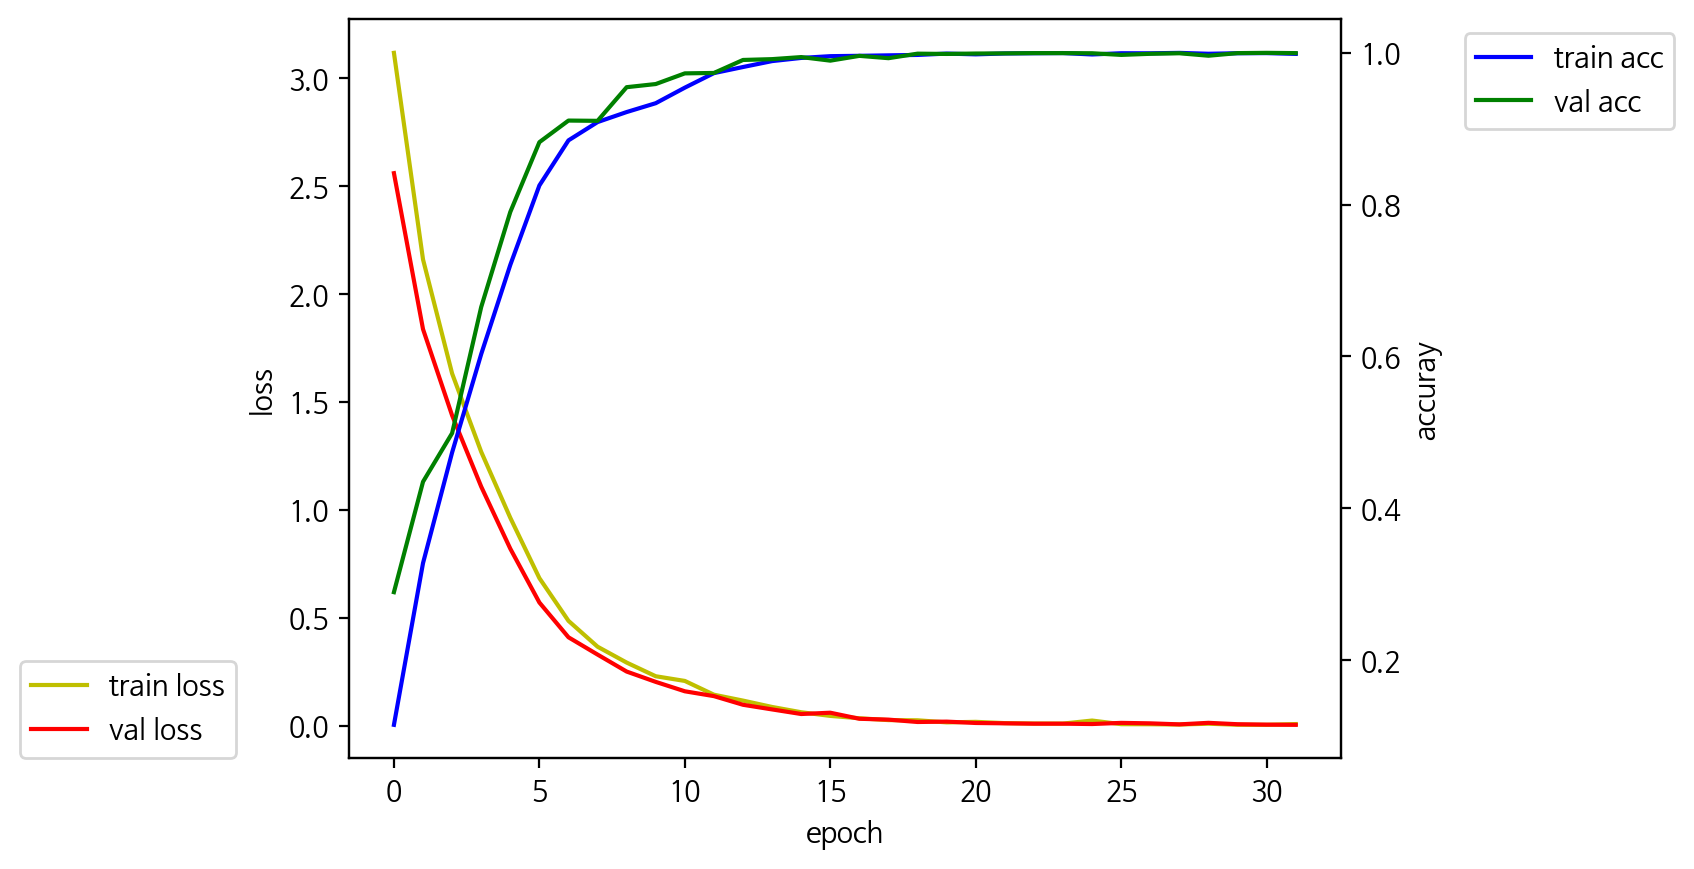

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(bbox_to_anchor=(-0.1,0.15))
acc_ax.legend(bbox_to_anchor=(1.35,1))

plt.savefig(r'Z:\Subi\BDJ_DNN\DNN_Model3.png')
plt.show()

In [15]:
val_pred = dnn_model3.predict(val_x)
accuracy = dnn_model3.evaluate(val_x,val_y)

174/174 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.9995


In [16]:
dnn_model3.evaluate(train_x,train_y)

405/405 [==============================] - 0s 749us/step - loss: 0.0024 - accuracy: 0.9998


[0.0023614545352756977, 0.999845564365387]